In [11]:
import sys
sys.path.insert(0, '../../..')
from metrics import evaluate_classification
from plots import plot_decision_boundary, plot_data
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification, make_moons
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
class NeuralNet:
    def __init__(self, normalize = True, learning_rate = 0.01, num_iter = 30000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
    
    def __normalize(self, X, mean = None, std = None):
        n = X.shape[0]
        m = mean
        if m is None:
            m = np.mean(X, axis=1).reshape((n, 1))
        s = std
        if s is None:
            s = np.std(X, axis=1).reshape((n, 1))
        X_new = (X - m) / s
        return X_new, m, s

    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def __initialize_parameters(self, n_x, n_1):
        W1 = np.random.randn(n_1, n_x) * 0.01
        b1 = np.zeros((n_1, 1))
        W2 = np.random.randn(1, n_1) * 0.01
        b2 = 0 # у вихідному шарі лише 1 нейрон
        self.parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}
       
    def __forward_propagation(self, X):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = self.__sigmoid(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = self.__sigmoid(Z2)

        
        cache = (W1, b1, W2, b2, Z1, A1, Z2, A2)

        return A2, cache
    
    def compute_cost(self, A, Y):
        m = Y.shape[1]
        res = Y * np.log(A) + (1 - Y) * np.log(1 - A)
        J = -(1 / m) * np.sum(res)
        return J
        
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        n = X.shape[0]
        (W1, b1, W2, b2, Z1, A1, Z2, A2) = cache
        
        dZ2 = A2 - Y
        dW2 = 1. / m * np.dot(dZ2, A1.T)
        db2 = 1. / m * np.sum(dZ2, axis = 1, keepdims = True)
        
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = np.multiply(dA1, np.multiply(A1, 1 - A1))
        dW1 = 1. / m * np.dot(dZ1, X.T)
        db1 = 1. / m * np.sum(dZ1, axis = 1, keepdims = True)
        

        grads = {"dZ1" : dZ1, "dW1" : dW1, "db1" : db1, "dZ2" : dZ2, "dW2" : dW2, "db2" : db2}
        return grads
    
    def __update_parameters(self, grads):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        

        self.parameters["W1"] = W1 - self.learning_rate * dW1
        self.parameters["b1"] = b1 - self.learning_rate * db1
        self.parameters["W2"] = W2 - self.learning_rate * dW2
        self.parameters["b2"] = b2 - self.learning_rate * db2

        
    def fit(self, X_vert, Y_vert, print_cost = True):
        
        X, Y = X_vert.T, Y_vert.T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        
        m = X.shape[1]
        n_x = X.shape[0]
        
        self.__initialize_parameters(n_x, 20)

        for i in range(self.num_iter):
            A, cache = self.__forward_propagation(X)

            cost = self.compute_cost(A, Y)

            grads = self.__backward_propagation(X, Y, cache)

            self.__update_parameters(grads)

            if print_cost and i % 1000 == 0:
                print("{}-th iteration: {}".format(i, cost))

            if i % 1000 == 0:
                costs.append(cost)

        if print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.xlabel("Iteration, *1000")
            plt.show()
    
    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0]
        
        return np.column_stack((1 - probs.T, probs.T))
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)[:, 1]
        return (positive_probs >= 0.5).astype(int)   


# Симульовані дані 1

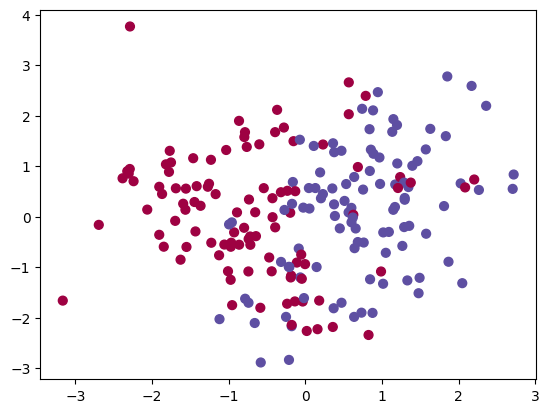

0-th iteration: 0.6932699349436237
1000-th iteration: 0.6925093336955521
2000-th iteration: 0.6911655174868181
3000-th iteration: 0.6849560287250093
4000-th iteration: 0.6589878937801161
5000-th iteration: 0.587872005331716
6000-th iteration: 0.5059306566576155
7000-th iteration: 0.46418292154152463
8000-th iteration: 0.4486844570831503
9000-th iteration: 0.44308631090595496
10000-th iteration: 0.44098435369573025
11000-th iteration: 0.44013846231265535
12000-th iteration: 0.4397514884397941
13000-th iteration: 0.4395337591230368
14000-th iteration: 0.43937861771668935
15000-th iteration: 0.4392463815286973
16000-th iteration: 0.4391220559239713
17000-th iteration: 0.43899976963774173
18000-th iteration: 0.43887701122775075
19000-th iteration: 0.43875248503852265
20000-th iteration: 0.4386253093693018
21000-th iteration: 0.4384947138196065
22000-th iteration: 0.43835992294107656
23000-th iteration: 0.43822011011910134
24000-th iteration: 0.43807437891242706
25000-th iteration: 0.437921

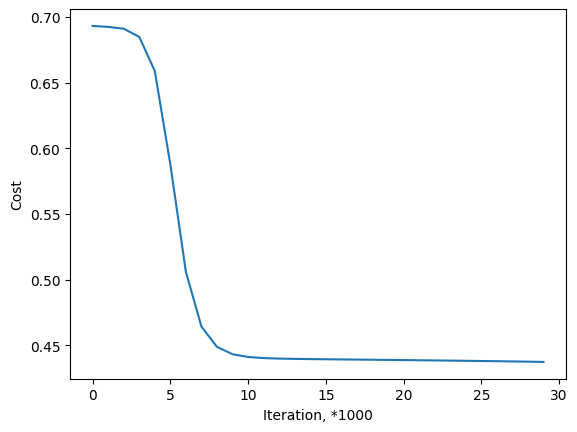

Accuracy: 
0.775
Report: 
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.71      0.83      0.77        18

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.78        40

Confusion: 
    0   1
0  16   6
1   3  15


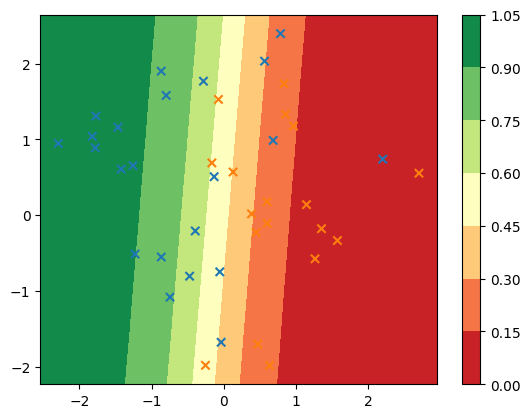

In [13]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

nn = NeuralNet()
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

# Симульовані дані 2

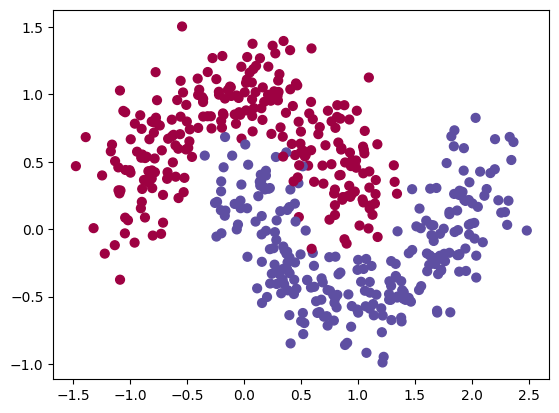

0-th iteration: 0.6931566110940861
1000-th iteration: 0.28206608989813153
2000-th iteration: 0.2811602663449927
3000-th iteration: 0.28071403593568584
4000-th iteration: 0.2804399436748468
5000-th iteration: 0.28024982140912735
6000-th iteration: 0.2801066765379497
7000-th iteration: 0.2799916617031451
8000-th iteration: 0.27989331850528426
9000-th iteration: 0.27980241387476795
10000-th iteration: 0.27970615790299164
11000-th iteration: 0.2795652151117497
12000-th iteration: 0.2790129937430089
13000-th iteration: 0.26730841877784317
14000-th iteration: 0.24760940887250812
15000-th iteration: 0.24034778943124288
16000-th iteration: 0.23710171407876904
17000-th iteration: 0.23522120362103993
18000-th iteration: 0.2134870047573897
19000-th iteration: 0.11761748117767468
20000-th iteration: 0.09419760898763685
21000-th iteration: 0.08452405267136927
22000-th iteration: 0.07864374209124446
23000-th iteration: 0.07421320309752318
24000-th iteration: 0.07039677634466866
25000-th iteration: 0

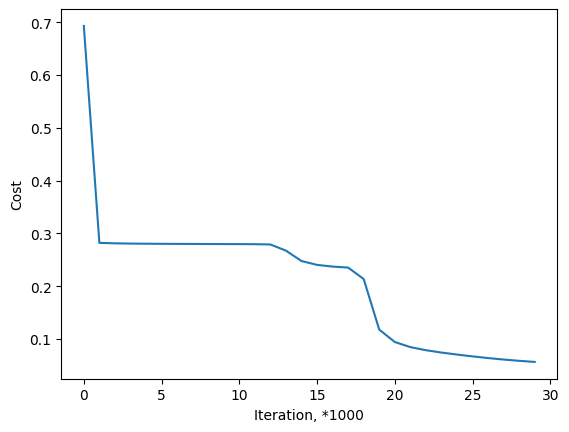

Accuracy: 
0.99
Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        57

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion: 
    0   1
0  43   0
1   1  56


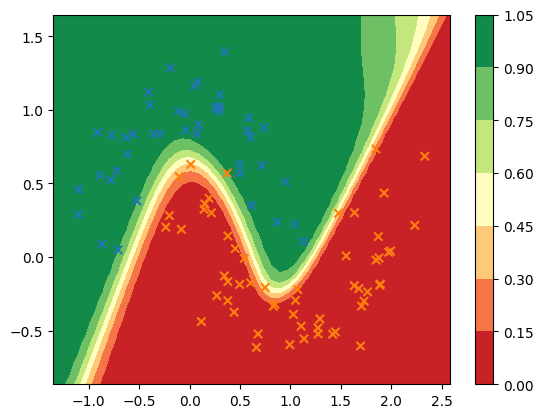

In [14]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

nn = NeuralNet(learning_rate = 0.5)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

# Tests dataset

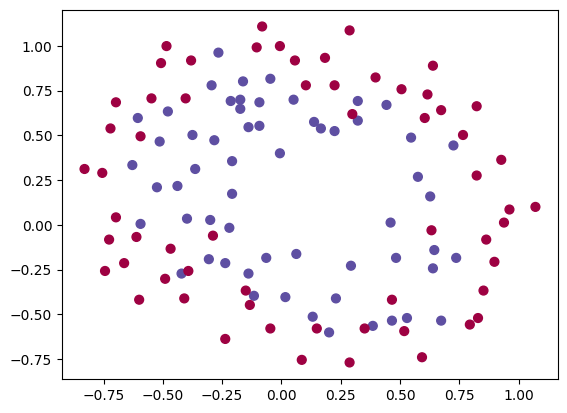

In [15]:
data_columns = ["test1", "test2"]
target_column = "passed"
df = pd.read_csv("tests.csv")
X, y = df[data_columns].values, df[target_column].values

plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

0-th iteration: 0.6933942893567022
1000-th iteration: 0.6836908205093994
2000-th iteration: 0.6676138930501507
3000-th iteration: 0.4864983040355779
4000-th iteration: 0.3901718164781174
5000-th iteration: 0.36866141942538594
6000-th iteration: 0.35188527475149667
7000-th iteration: 0.3327473889298059
8000-th iteration: 0.31351969981935857
9000-th iteration: 0.30378282834399345


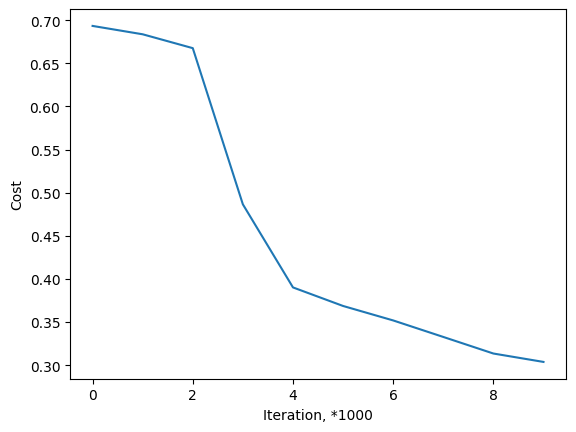

Accuracy: 
0.75
Report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.75      0.75      0.75        12

    accuracy                           0.75        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.75      0.75      0.75        24

Confusion: 
   0  1
0  9  3
1  3  9


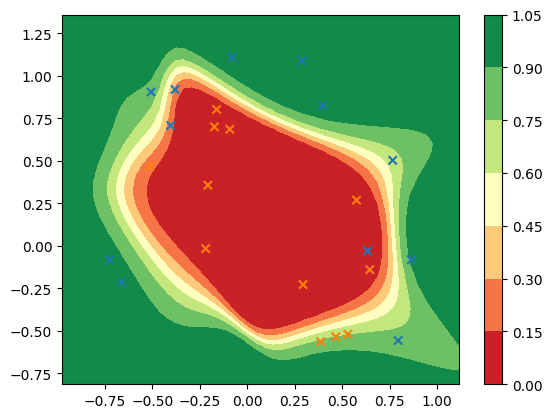

In [16]:
nn = NeuralNet(normalize = True, learning_rate = 0.5, num_iter = 10000)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

In [17]:
print(nn.parameters)

{'W1': array([[ 9.25201797e+00,  2.61196358e+00],
       [ 3.81913113e-02,  1.04938432e-01],
       [ 4.05958185e-02,  1.10583618e-01],
       [ 1.22405920e-03,  8.69949266e-02],
       [-6.76050674e-01,  6.00252952e-01],
       [-3.87628039e-02, -1.12965284e+00],
       [ 3.93969283e-01,  2.93591297e-01],
       [ 2.84265686e+00,  3.29159584e+00],
       [-1.61505604e+00, -2.78278496e+00],
       [-6.37594272e-02,  4.76283873e-02],
       [-3.34463936e+00, -7.15429488e-01],
       [ 1.87747150e-01,  2.27707714e-01],
       [ 6.66281120e-01,  2.52366068e-01],
       [ 2.21305972e-01,  2.45939541e-01],
       [-2.32258612e+00,  2.85665492e+00],
       [ 1.51214452e-02, -1.25644167e+00],
       [ 8.10305675e-02,  1.39940938e-01],
       [-6.83294957e-01,  4.13505088e+00],
       [ 1.19453185e-01,  1.65618388e-01],
       [ 3.78259941e-01,  2.99303154e-01]]), 'b1': array([[ 4.49330402e+00],
       [ 1.28574224e-01],
       [ 1.25762193e-01],
       [ 1.63226273e-01],
       [-8.55212681e-

Зверніть увагу на границю прийняття рішення. Модель старається побудувати складну криву, що може свідчити про її перетренування. Порівняйте отримані результати з класом з sklearn. Спробуйте додати нові шари для нашого класу та порівняти результати тоді. Поекспериментуйте з гіперпараметрами для обох класів.

Accuracy: 
0.7916666666666666
Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.82      0.75      0.78        12

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24

Confusion: 
    0  1
0  10  2
1   3  9


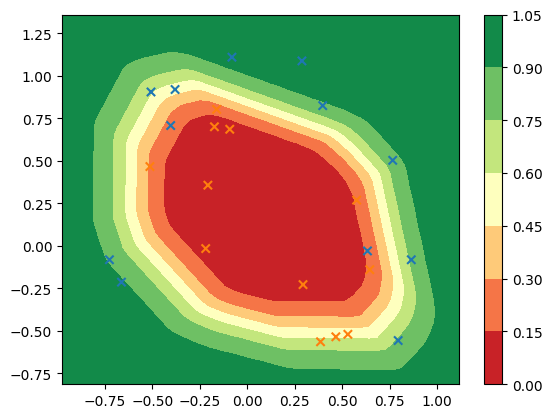

In [18]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (20,), max_iter = 10000)#, activation = 'logistic', solver = 'sgd', learning_rate_init = 0.01, learning_rate = 'constant')

clf.fit(X_train, y_train.ravel())
y_test_pred = clf.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(clf, X_test, y_test)
plt.show()

In [19]:
clf.n_iter_

1345